# Composers of classical music in *`.midi`* format
### Chieu Le Heng and Oliver James Tan
Identifying the composer of a piece of classical music is part of many music training programmes and tests (e.g. ABRSM aural tests). While speech recognition is a popular topic in AI, less work has been done on AI in music.

Much research has been done on working with `.mp3`/`.wav` files that store the sound waves of recordings of the pieces. Some approaches to working audio files include plotting a spectrogram and running image recognition on it, or computing the MFCC (Mel-Frequency Cepstrum Coefficients) of timeframes from the audio file and classifying based on that. However, much less work has been done with `.midi` files, which only encode when a note is played and at what amplitude.

When working with midi files, different approaches have been tried. Some algorithms extract hand-crafted features from the midi-files, such as note range and frequency (https://github.com/dantasfiles/CatiMidi), inter-onset interval (http://cs229.stanford.edu/proj2012/LanSaied-MusicClassificationByComposer.pdf) or tempo and frequency [b] which we try. Other algorithms liken midi files to language, and use tools like tf-idf frequency and 

In this project, we work on a dataset of `.midi` files from http://www.kunstderfuge.com/.

First, we tried using the python library `pretty_midi` to **extract features** such as tempo from the midi files, and classified the tracks based on the results. However, the results were appallingly bad, and we got an accuracy of 42.5%. Normalising the features improved the results to 75.0%, and tuning hyperparameters boosts performance to 76.0%. This reflects that simple metrics such as tempo and time signature are sufficient to reflect composers' styles.

(For chord frequency, refer to `experiment-preprocessing.ipynb` and `experiment-classification.ipynb` for now) Next, we classify the files with using **chord frequency** and chord progression [1, 3]. In music theory, chords are groups of notes that are usually played at the same time, and chords are to notes as words are to letters. In fact, chord progessions like the imperfect cadence are very popular and often used to end a section. Hence, chords can reveal stylistic choices that the composer might have made for a piece. `tf-idf` is used on the frequency of each chord, similar to how it n-grams are computed for words in NLP (Natural Language Processing). We find this approach successful in classifying the files, getting an accuracy of 55.61%.

Part of the diffic

Having successfully classified the files, we proceeded to **cluster** and **visualise** based on chord frequency, to observe what other patterns there are between the files, an approach that has not been tried before. We notice that ___.

Lastly, we **characterise** our model, and look at what chords and chord progressions our model has attributed to each composer. This information may prove useful for music students familiarising themselves with composers' styles.

### References
[1] A. Koh. Recognising Classical Composers using High-Level Music Features

[2] https://arxiv.org/pdf/1706.08928.pdf

[3] https://github.com/robert-d-schultz/music-classification/blob/master/preprocess.py

### Code sources
[a] https://github.com/achimkoh/midi-classification

[b] https://github.com/sandershihacker/midi-classification-tutorial/blob/master/midi_classifier.ipynb

First, we download the `.midi` files that have been converted to piano roll format, and convert them back to `.midi` files.

In [46]:
!pip install pygame
!pip install pretty_midi
!pip install pypianoroll
!pip install music21
import numpy as np
import pandas as pd
import music21
#from google.colab import drive
import os
import pickle
from tqdm.notebook import *
from pypianoroll import plot, Track, Multitrack

#drive.mount('/content/drive')
#os.chdir('/content/drive/My Drive/Colab Notebooks/ClassicalPianoRolls')

In [182]:
with open('music.pk', 'rb') as file:
    music = pickle.load(file)
music[0]

{'name': 'albeniz_suite_espanola_47_02_cataluna_(c)yogore.mid',
 'composer': 'Albeniz',
 'piece': <7368x128 sparse matrix of type '<class 'numpy.float64'>'
 	with 28387 stored elements in COOrdinate format>}

# Data handling

5992
{'Albeniz': 68, 'Alkan': 249, 'Bach, J.S': 1965, 'Bartók': 17, 'Beethoven': 290, 'Brahms': 150, 'Buxtehude': 63, 'Byrd': 113, 'Chopin': 252, 'Clementi': 45, 'Couperin': 1, 'Dandrieu': 163, 'Debussy': 149, 'Dvořák': 147, 'Fauré': 96, 'Frescobaldi': 86, 'Froberger': 45, 'Gesualdo da Venosa': 37, 'Handel': 496, 'Haydn, F': 237, 'Mahler': 32, 'Mendelssohn-B': 61, 'Mozart': 568, 'Mussorgsky': 29, 'Pachelbel, J': 86, 'Praetorius': 36, 'Pres (Despres)': 29, 'Rachmaninov': 25, 'Ravel': 50, 'Reger': 32, 'Saint-Saëns': 95, 'Satie': 47, 'Scarlatti, D': 555, 'Schubert': 281, 'Schumann': 102, 'Scriabin': 27, 'Stravinsky': 39, 'Tchaikovsky': 275, 'Telemann': 60, 'Vivaldi': 36}
{'Alkan': 249, 'Bach, J.S': 1965, 'Beethoven': 290, 'Brahms': 150, 'Byrd': 113, 'Chopin': 252, 'Dandrieu': 163, 'Debussy': 149, 'Dvořák': 147, 'Handel': 496, 'Haydn, F': 237, 'Mozart': 568, 'Scarlatti, D': 555, 'Schubert': 281, 'Schumann': 102, 'Tchaikovsky': 275}


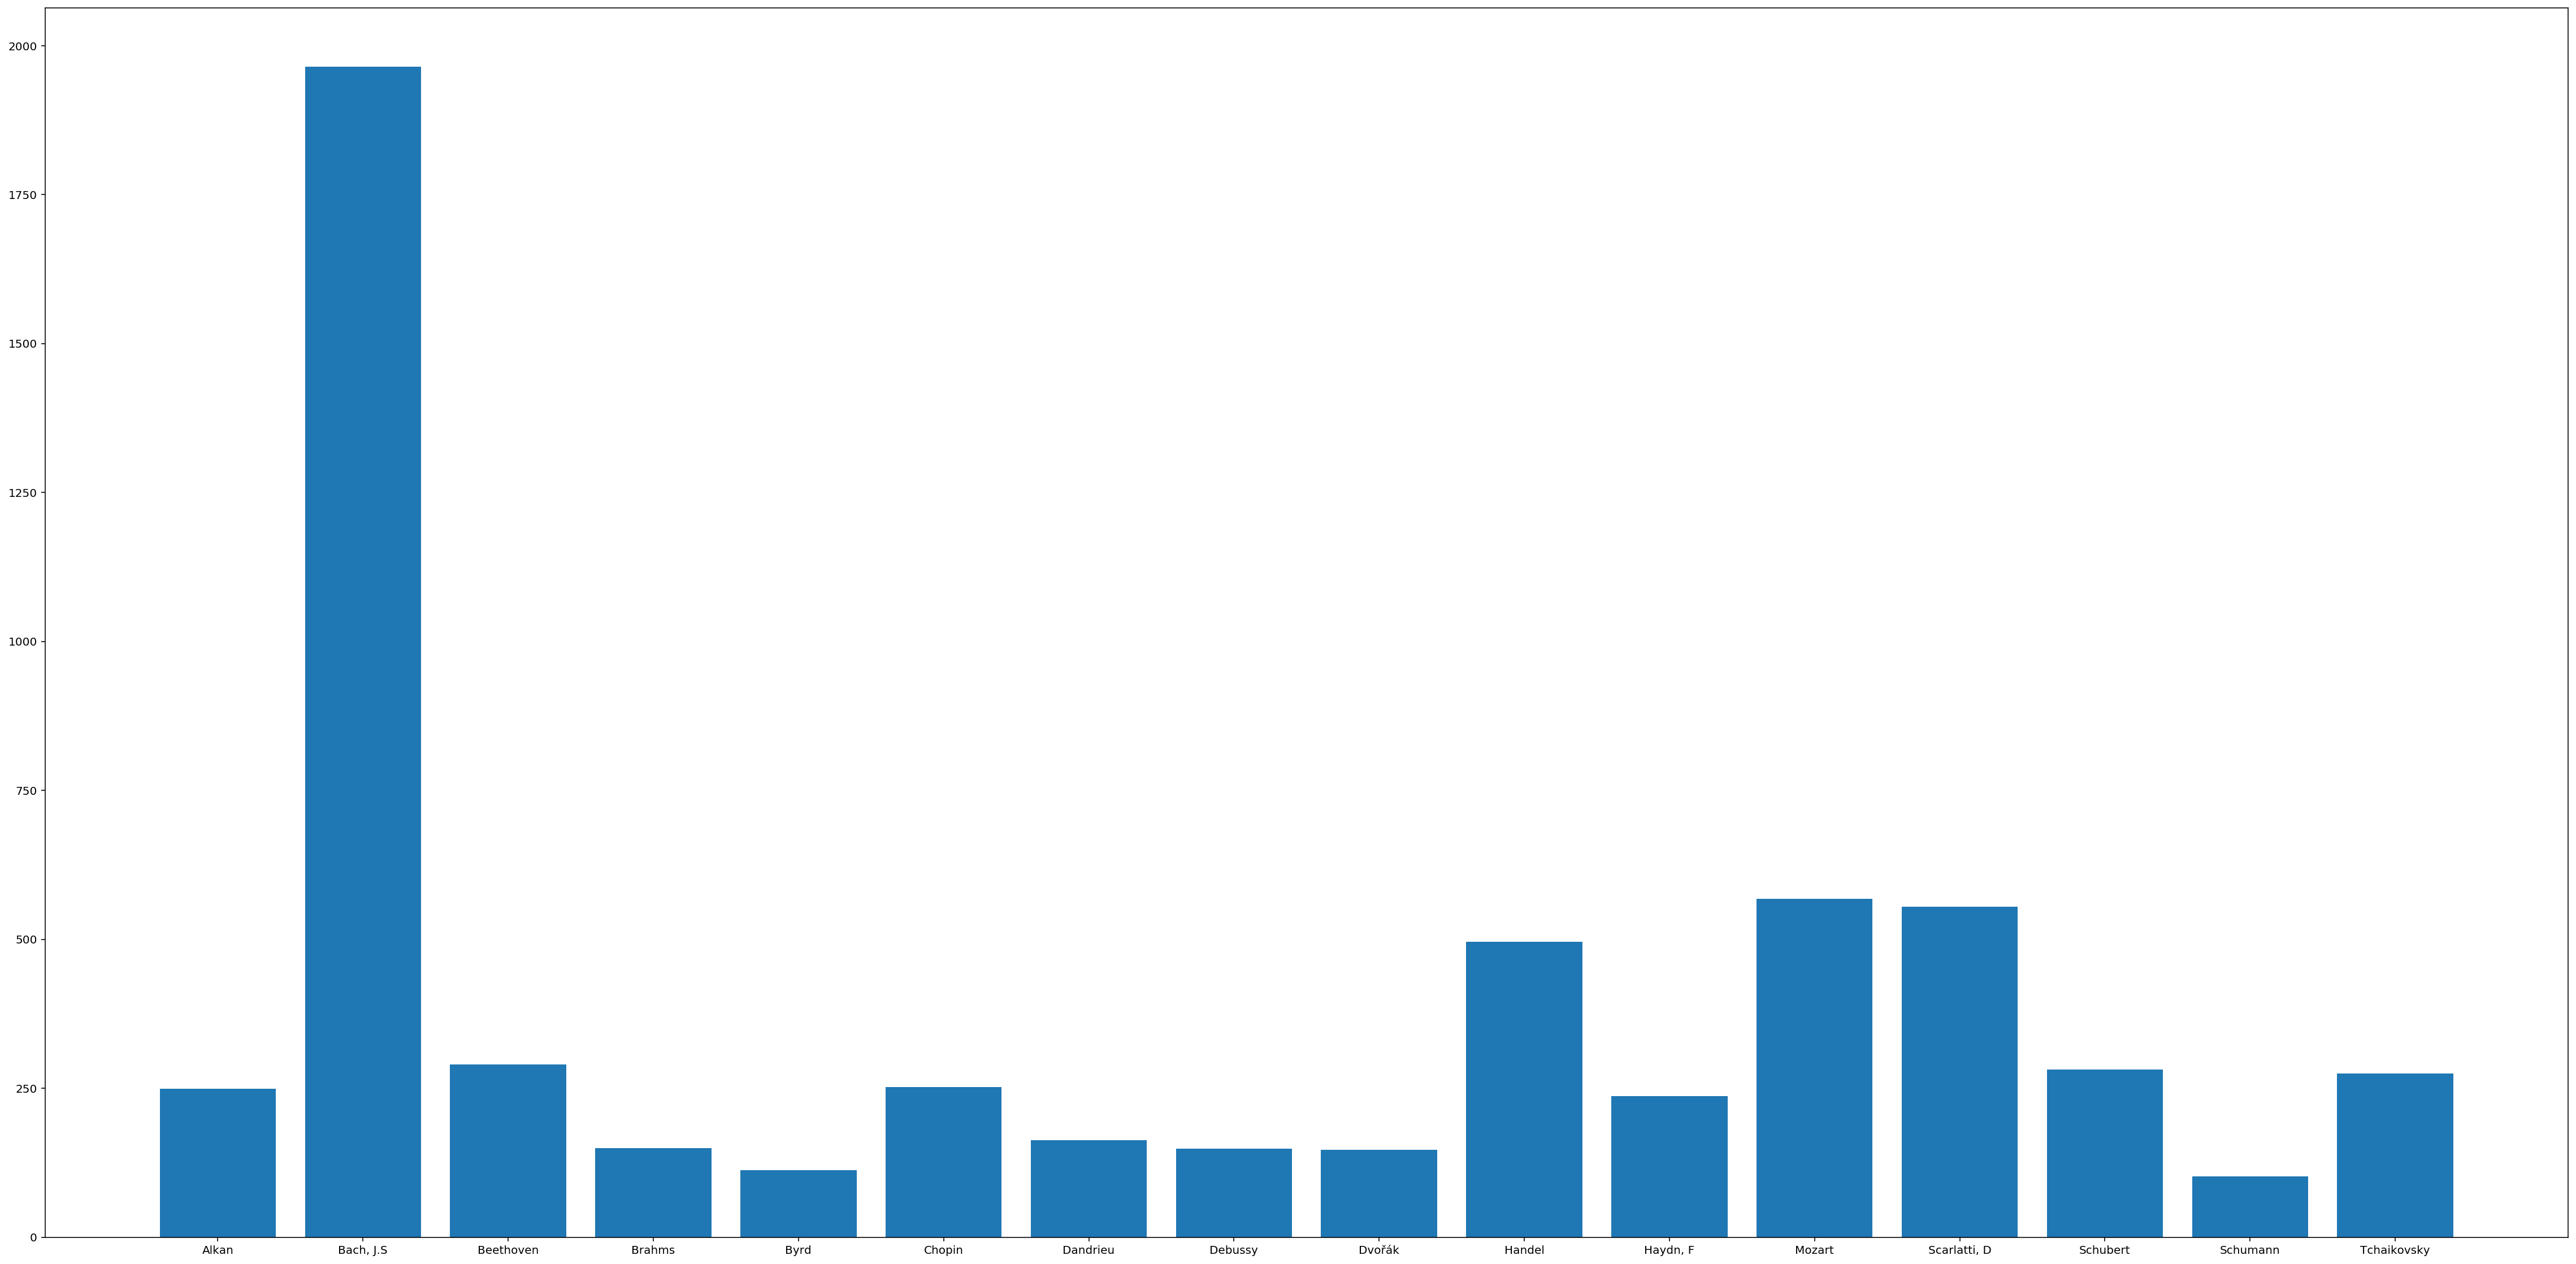

In [94]:
import random
from collections import Counter
import matplotlib.pyplot as plt
c = Counter([i["composer"] for i in music]).items()
fig, ax = plt.subplots(figsize=(40, 20))
c = dict(c)

# discard composers with less than 100 pieces
music = [piece for piece in music if c[piece["composer"]]>=100]
print(len(music))

print(c)
c = dict((i,j) for i,j in c.items() if j>=100)
ax.bar(c.keys(), c.values())
print(c)

In [95]:
# one-time terminal
import os, random
from unidecode import unidecode
random.seed(42)
sampler = random.sample(music, 200)
if not os.listdir("midi_files"):
  for i, piece in enumerate(tqdm(music)):
    track = Track(np.array(piece["piece"].todense())*127)
    Multitrack(tracks=[track], name=f'piece {i}, by {piece["composer"]}').write(f"midi_files/{i:04d}.midi")

In [97]:
from tqdm.notebook import *
import os
if False:
    for i in trange(5992):
        src = f'C:\\Users\\user\\Downloads\\classicall\\midi_files\\{i:04d}.midi'
        target = f'C:\\Users\\user\\Downloads\\classicall\\mxl_files\\{i:04d}.mxl'
        os.system(f'start "" "C:\\Program Files\\MuseScore 3\\bin\\MuseScore3.exe" {src} --export-to {target}')

In [124]:
for dire, length in zip(('midi_files', 'mxl_files'), (9, 8)):
    for file in tqdm(os.listdir(dire)):
        if len(file) != length:
            print(file)
            os.system(f'del C:\\Users\\user\\Downloads\\classicall\\{dire}\\{file}')

000.midi
001.midi
002.midi
003.midi
004.midi
005.midi
006.midi
007.midi
008.midi
009.midi
010.midi
011.midi
012.midi
013.midi
014.midi
015.midi
016.midi
017.midi
018.midi
019.midi
020.midi
021.midi
022.midi
023.midi
024.midi
025.midi
026.midi
027.midi
028.midi
029.midi
030.midi
031.midi
032.midi
033.midi
034.midi
035.midi
036.midi
037.midi
038.midi
039.midi
040.midi
041.midi
042.midi
043.midi
044.midi
045.midi
046.midi
047.midi
048.midi
049.midi
050.midi
051.midi
052.midi
053.midi
054.midi
055.midi
056.midi
057.midi
058.midi
059.midi
060.midi
061.midi
062.midi
063.midi
064.midi
065.midi
066.midi
067.midi
068.midi
069.midi
070.midi
071.midi
072.midi
073.midi
074.midi
076.midi
077.midi
078.midi
079.midi
080.midi
081.midi
082.midi
083.midi
084.midi
085.midi
086.midi
087.midi
088.midi
089.midi
090.midi
091.midi
092.midi
093.midi
094.midi
095.midi
096.midi
097.midi
098.midi
099.midi
100.midi
101.midi
102.midi
103.midi
104.midi
105.midi
106.midi
107.midi
108.midi
109.midi
110.midi
111.midi
1

000.mxl
001.mxl
002.mxl
003.mxl
004.mxl
005.mxl
006.mxl
007.mxl
008.mxl
009.mxl
010.mxl
011.mxl
012.mxl
013.mxl
014.mxl
015.mxl
016.mxl
017.mxl
018.mxl
019.mxl
020.mxl
021.mxl
022.mxl
023.mxl
024.mxl
025.mxl
026.mxl
027.mxl
028.mxl
029.mxl
030.mxl
031.mxl
032.mxl
033.mxl
034.mxl
035.mxl
036.mxl
037.mxl
038.mxl
039.mxl
040.mxl
041.mxl
042.mxl
043.mxl
044.mxl
045.mxl
046.mxl
047.mxl
048.mxl
049.mxl
050.mxl
051.mxl
052.mxl
053.mxl
054.mxl
055.mxl
056.mxl
057.mxl
058.mxl
059.mxl
060.mxl
061.mxl
062.mxl
063.mxl
064.mxl
065.mxl
066.mxl
067.mxl
068.mxl
069.mxl
070.mxl
071.mxl
072.mxl
073.mxl
074.mxl
075.mxl
076.mxl
077.mxl
078.mxl
079.mxl
080.mxl
081.mxl
082.mxl
083.mxl
084.mxl
085.mxl
086.mxl
087.mxl
088.mxl
089.mxl
090.mxl
091.mxl
092.mxl
093.mxl
094.mxl
095.mxl
096.mxl
097.mxl
098.mxl
099.mxl
100.mxl
101.mxl
102.mxl
103.mxl
104.mxl
105.mxl
106.mxl
107.mxl
108.mxl
109.mxl
110.mxl
111.mxl
112.mxl
113.mxl
114.mxl
115.mxl
116.mxl
117.mxl
118.mxl
119.mxl
120.mxl
121.mxl
122.mxl
123.mxl
124.mxl


In [183]:
random.seed(42)
#if True:
composers = set(piece["composer"] for piece in music)
pieces_by_composer = dict((composer, []) for composer in composers)
for i, piece in enumerate(music):
    pieces_by_composer[piece["composer"]].append(i)

composers = selected_composers = ("Bach", "Mozart", "Beethoven", "Debussy")
pieces_by_composer["Bach"] = pieces_by_composer["Bach, J.S"].copy()
del pieces_by_composer["Bach, J.S"]

if True:
    #i = 0
    with open('mxl-list.txt', 'w') as file:
        for composer in selected_composers:
            for piece in pieces_by_composer[composer]:
                #os.system(f'cp midi_files/{piece:04d}.midi midi_files/{i:03d}.midi')
                #os.system(f'cp mxl_files/{piece:04d}.mxl mxl_files/{i:03d}.mxl')
                file.write(f'{composer}_{piece:03d}.mxl\n')
                #i += 1

random.seed(42)
music = [music[piece] for composer in selected_composers for piece in pieces_by_composer[composer]]
for piece in music:
    if piece["composer"]=='Bach, J.S': piece["composer"] = 'Bach'
print(len(music))

random.seed(42)
print( [piece for composer in composers for piece in pieces_by_composer[composer]])
    #len(music)
    # random.sample(pieces_by_composer[composer], 50)
# in few_midi_files, 000.midi to 049.midi are by Bach,  050.midi to 099.midi by Mozart
#                    100.midi to 149.midi by Beethoven, 150.midi to 199.midi by Debussy

2972
[317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515,

In [186]:
# one-time terminal
if True:
    with open('mxl-list.txt', 'w') as file:
      for i, piece in enumerate(music):   
        piece["composer"] = unidecode(piece["composer"])
        file.write(f'{piece["composer"]}_{i:04d}.mxl\n')
        


# Visualisation

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26dd33193c8>)

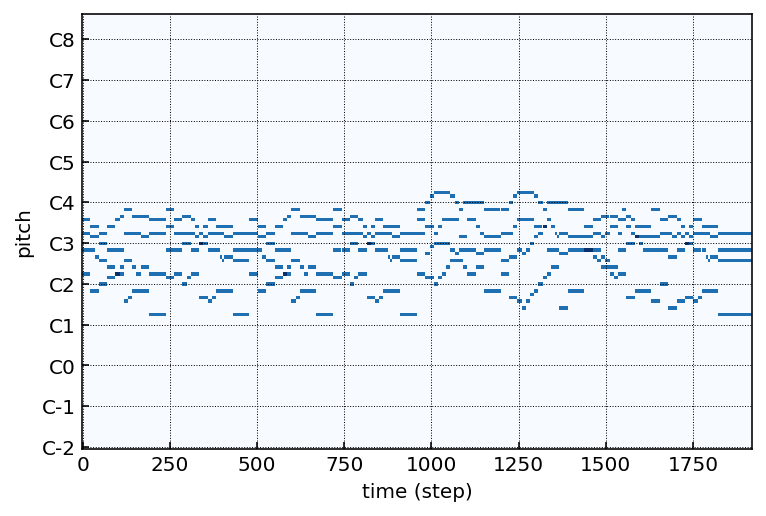

In [65]:
import matplotlib.pyplot as plt
piece = Track(np.array(music[0]["piece"].todense()))
plot(piece)

In [66]:
# playing around with pieces: keep, may be useful for prez
# source: ____
toPlay = False
if toPlay:
  import itertools
  from scipy.sparse import vstack
  import tqdm
  num_composers = 40
  chunk_size = 1024
  groups = itertools.groupby(sorted(music, key=lambda x: x["composer"]), lambda x: x["composer"])
  segments = []
  for composer, pieces in tqdm.tqdm_notebook(groups, total=num_composers):
      pieces_list = list(i["piece"].tocsr() for i in pieces)
      n = sum([i.shape[0] for i in pieces_list])//chunk_size
      if n!=0:
          trimmed_concat  = vstack(pieces_list)[:chunk_size*n]
          composer_segs = [(trimmed_concat[i:i+chunk_size], composer) for i in range(0,n*chunk_size,chunk_size)]
          segments.extend(composer_segs)
  random.shuffle(segments)
##################################################
from pypianoroll import Multitrack, Track
import pygame

def write_midi(arr, filename):
    Multitrack(tracks=[Track(arr*127)]).write(filename) # why *127? I don't understand
def play(filename):
    pygame.mixer.init()
    pygame.mixer.music.load(filename)
    # warning: doesn't work on Google Colab, works in local .ipynb
    pygame.mixer.music.play()
def test(num):
    answers = []
    for seg, comp in segments[:num]:
        write_midi(seg.toarray(), "temp2.mid")
        play("temp.mid")
        inp = input("Who was it?")
        if inp=="quit":
            break
        if len(inp)>=3 and inp.lower() in comp.lower():
            print(f"Correct the composer was {comp}")
            answers.append((comp, True))
        else:
            print(f"Incorrect the composer was {comp}")
            answers.append((comp, False))
    return answers
#test(7)

# 1. `pretty-midi`

In [69]:
import pretty_midi
# source: https://github.com/sandershihacker/midi-classification-tutorial/blob/master/midi_classifier.ipynb
def get_features(path):
    """
    This function extracts the features from a midi file when given its path.
    
    @input path: The path to the midi file.
    @type path: String
    
    @return: The extracted features.
    @rtype: List of float
    """
    #try:
    file = pretty_midi.PrettyMIDI(path)
    
    tempo = file.estimate_tempo()
    num_sig_changes = len(file.time_signature_changes)
    resolution = file.resolution
    ts_changes = file.time_signature_changes
    ts_1 = 4
    ts_2 = 4
    if len(ts_changes) > 0:
        ts_1 = ts_changes[0].numerator
        ts_2 = ts_changes[0].denominator
    return [tempo, num_sig_changes, resolution, ts_1, ts_2]
    #except Exception as e:
    #    print(e)
    #    return None

# original dataset doesn't have time signature data, and we can't find a package
#   that guesses it - oof
attr_lists = [[] for i in range(5)]
for i, piece in enumerate(music):
  for i, attr in enumerate(get_features(f'midi_files/{i:03d}.midi')):
    attr_lists[i].append(attr)
  if i==0:break

df = pd.DataFrame({
          'composer': [piece["composer"] for piece in music],
          'tempo': attr_lists[0],  
          'num_sig_changes': attr_lists[1], 
          'resolution': attr_lists[2], 
          'ts_1': attr_lists[3], 
          'ts_2': attr_lists[4],       
}, index=None)

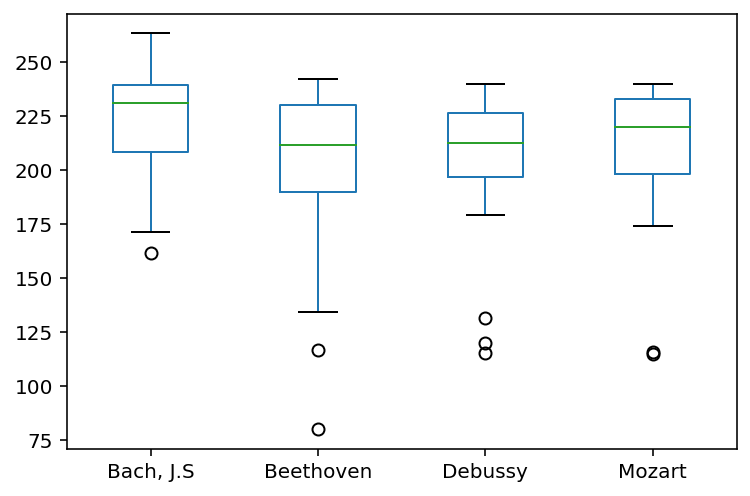

In [70]:
df.describe()
df.assign(index=df.groupby('composer').cumcount()).pivot('index','composer','tempo').plot(kind='box')
# https://stackoverflow.com/questions/48712274/matplotlib-box-plot-for-each-category#48712368

# Classification from attributes

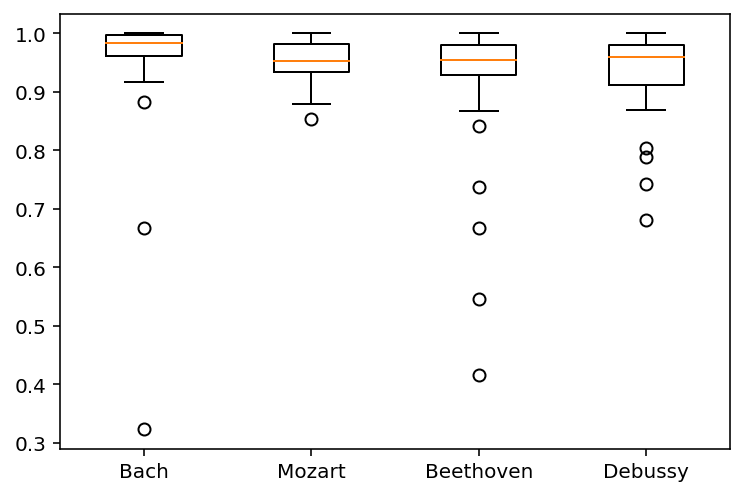

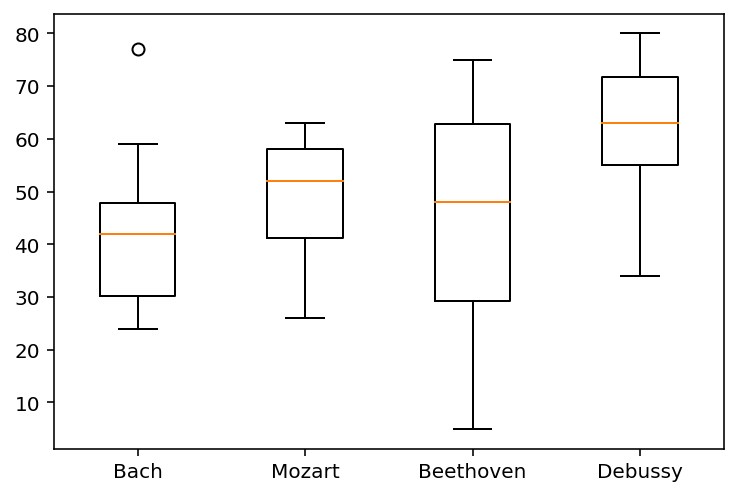

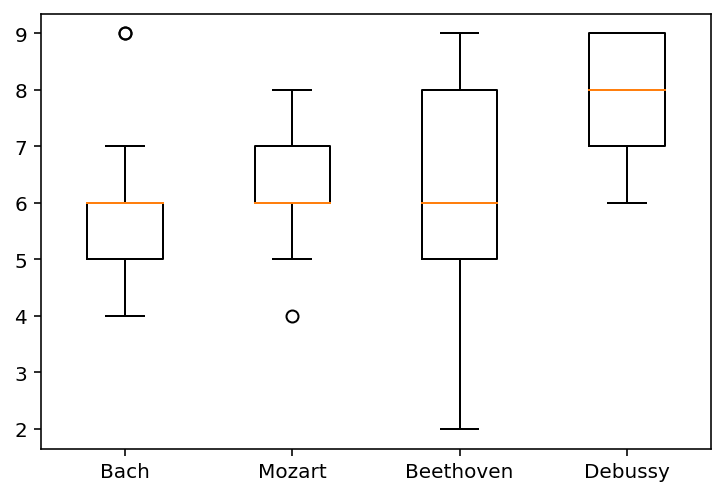

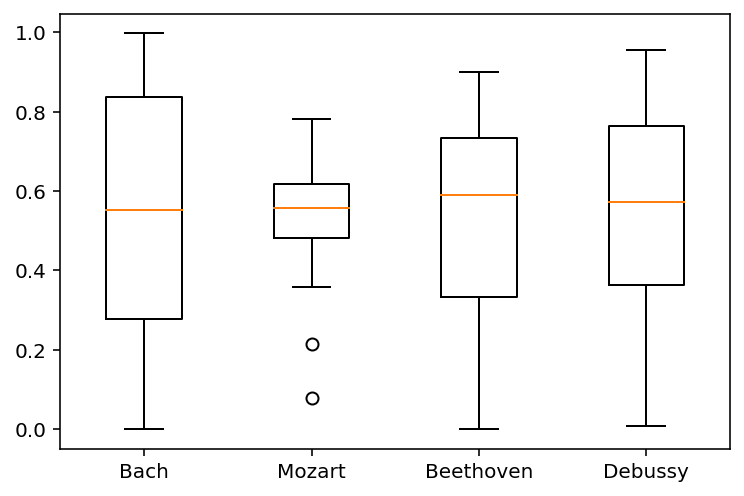

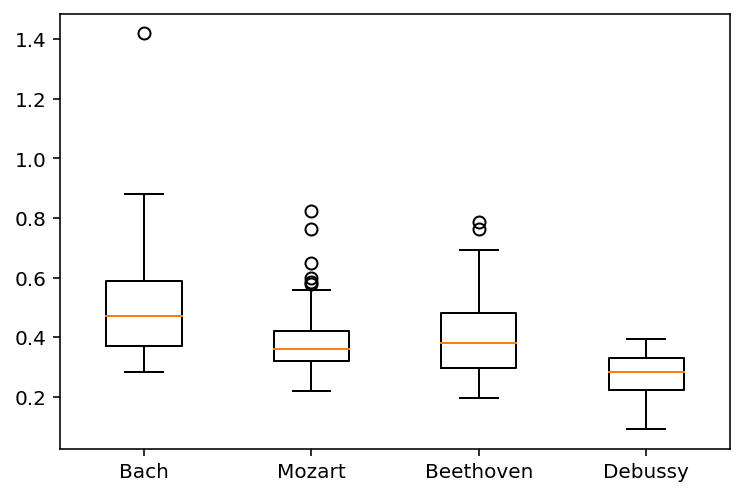

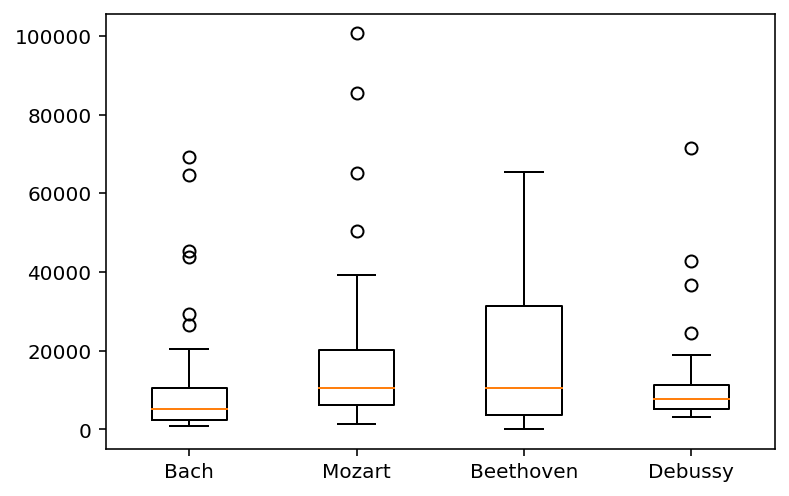

In [142]:
##################
# VISUALISATION
##################
from pypianoroll.metrics import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def dict_(): return dict((composer, []) for composer in composers)
arr, e, npu, npc, q, p, dip, isr, lr =  dict_(), dict_(), dict_(), dict_(), dict_(), dict_(), dict_(), dict_(), dict_()
# empty_beat rate, number of pitches used, number of pitch classes, qualified note rate, polyphonic rate, _, _, length
ear = []
npuar = []
npcar = []
par = []
israr = []
lar = []
traits = pd.DataFrame

for piece in tqdm(music):
    arr = np.array(piece["piece"].todense())
    composer = piece["composer"]
    e[composer] += [empty_beat_rate(arr, 4)] # need time sig
    npu[composer] += [n_pitches_used(arr)]
    npc[composer] += [n_pitch_classes_used(arr)]
    #q[composer] += [qualified_note_rate(arr)]
    p[composer] += [polyphonic_rate(arr)]
    #dip[composer] += [drum_in_pattern_rate(arr, 4)]
    isr[composer] += [in_scale_rate(arr)]
    lr[composer] += [arr.shape[0]]

    ear.append(e[composer][-1])
    npuar.append(npu[composer][-1])
    npcar.append(npc[composer][-1])
    par.append(p[composer][-1])
    israr.append(isr[composer][-1])
    lar.append(lr[composer][-1])
    #print(f'{polyphonic_rate(, beat_resolution=4):.3f}')

import matplotlib.pyplot as plt
'''plt.hist(e)
plt.figure(); plt.hist(npu)
plt.figure(); plt.hist(npc)
plt.figure(); plt.hist(p)
plt.figure(); plt.hist(isr)'''

for set_ in (e, npu, npc, p, isr, lr):
    #plt.figure(figsize=(20,5))
    plt.figure()
    plt.boxplot(set_.values(), labels=set_.keys())

In [164]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import *
from sklearn import *
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import scipy

X = pd.DataFrame({
    'e': ear,
    'npu': npuar,
    'npc': npcar,
    'p': par,
    'isr': israr,
    'tempo': df['tempo'],
    'l': lar,
})

with open('indices.pickle', 'wb') as file:
    X = (X-X.mean()) / X.std()
    pickle.dump(X, file)


y = pd.DataFrame({
    'composer': [piece["composer"] for piece in music],
})

print('SPLITTING INTO TRAIN AND TEST')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


model = MLPClassifier()
model.fit(X_train, y_train)
print('score is', model.score(X_test, y_test))

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

SPLITTING INTO TRAIN AND TEST


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


score is 0.62
[[ 8  2  1  2]
 [ 3  5  3  1]
 [ 0  1 12  0]
 [ 1  4  1  6]]
              precision    recall  f1-score   support

        Bach       0.67      0.62      0.64        13
   Beethoven       0.42      0.42      0.42        12
     Debussy       0.71      0.92      0.80        13
      Mozart       0.67      0.50      0.57        12

    accuracy                           0.62        50
   macro avg       0.61      0.61      0.61        50
weighted avg       0.62      0.62      0.61        50



In [177]:
raise ValueError('Don\'t run again')
print('CROSS_VAL_SCORE')
names = ['MLP', 'SVC', 'LinSVC', 'LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']

param_spaces = [
    {
        'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant','adaptive'],
    },
    {'C': scipy.stats.expon(scale=100).rvs(4), 'gamma': scipy.stats.expon(scale=.1).rvs(4),
          'kernel': ['rbf'], 'class_weight':['balanced', None]},
    {'penalty': ['l1','l2'], 'C': 10.0 ** np.arange(-3, 4)},
    {'penalty': ['l1','l2'], 'C': 10.0 ** np.arange(-3, 4)},
    {'n_neighbors': [1, 2, 3, 4, 6, 8, 11, 20, 40], 'weights': ['distance', 'uniform'], 'p': [1, 2, 3]},
    {'n_estimators': [100, 300, 500, 800, 1200], 'max_depth': [5, 8, 15, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10],},
    {
        "n_estimators":[5,50,250,500],
        "max_depth":[1,3,5,7,9],
        "learning_rate":[0.01,0.1,1,10,100]
    } # https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/
]

models = [
    MLPClassifier(),
    svm.SVC(),
    svm.LinearSVC(penalty='l2', C=5, loss='hinge'),
    linear_model.LogisticRegression(penalty='l2', C=100, tol=1, multi_class='multinomial', solver='sag'),
    neighbors.KNeighborsClassifier(weights='distance'),
    #naive_bayes.MultinomialNB(alpha=0.00001, fit_prior=False),
    RandomForestClassifier(n_estimators=1000, random_state=42),
    GradientBoostingClassifier(n_estimators=1000, max_leaf_nodes=4, max_depth=None, random_state=2,
                   min_samples_split=5),
]
average_scores = []
for name, param_space, model_cv in zip(tqdm(names, unit='model'), param_spaces, models):
    np.random.seed(42)
    clf = GridSearchCV(model_cv, param_space, n_jobs=-1, refit=True, verbose=3)
    clf.fit(X, y)
    print('Best parameters found:\n', clf.best_params_)

    #scores = cross_val_score(model_cv, X, y)
    #print(f'{name:^24} | score = {sum(scores)/len(scores):.3f}\n')
    
    #print(' '.join(f'{score:.3f}' for score in scores))
    print(f'{name:^24} | score = {clf.best_score_:.3f}\n')
    average_scores.append(clf.best_score_)

print(f'''\n\nWe get a best average classification accuracy of {max(average_scores):.3f}.
Compare this with the score for tf-idf on chord frequency later.''')

CROSS_VAL_SCORE


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   31.4s finished
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
          MLP            | score = 0.720

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.6s finished
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters found:
 {'C': 20.26485043181491, 'class_weight': 'balanced', 'gamma': 0.05902887476385446, 'kernel': 'rbf'}
          SVC            | score = 0.685

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters found:
 {'C': 1.0, 'penalty': 'l2'}
         LinSVC          | score = 0.535

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters found:
 {'C': 10.0, 'penalty': 'l2'}
   LogisticRegression    | score = 0.540

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.9s finished
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters found:
 {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
  KNeighborsClassifier   | score = 0.715

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 14.0min finished
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters found:
 {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
 RandomForestClassifier  | score = 0.760

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.7min finished
C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found:
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
GradientBoostingClassifier | score = 0.730




We get a best average classification accuracy of 0.760.
Compare this with the score for tf-idf on chord frequency later.


# 2. tf-idf by chord frequency

# 3. Characterisation (To-do)
Look at which features are most important in classifying the music/try to *explain* the classification. (e.g., look at the chord or pair of chords for tf-idf that match to each composer)


Change a chord or two and see if the classification changes. (can extend to adverserial neural networks that mess with the pieces and make them misclassified if we really, really have time)

Pass some *very* short/interesting pieces (like the school song) through the classifier, look at the labels, and see what that can tell us
